# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [17]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
# Inspect the shapes of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


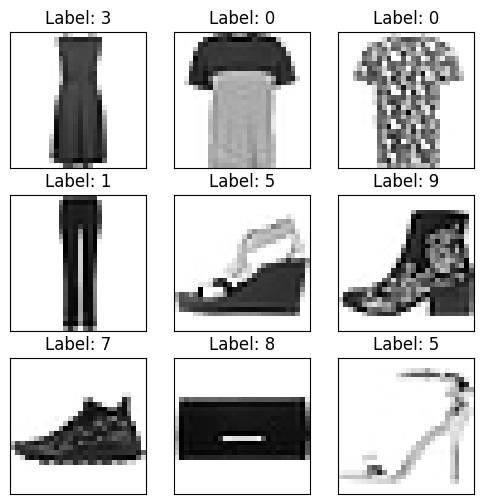

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# Verify the data looks as expected

fashion = fashion_mnist
# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {y_train[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

The image quality is quite poor which will make identification or classification more difficult. 

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Create a simple linear regression model
model = Sequential()

optimizer = Adam()  # Addition of momentum

# Input layer
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes
# You can use `model.add(<layer>)` to add layers to the model

# Compile the model using `model.compile()`
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

# Train the model with `model.fit()`
model.fit(
    X_train, 
    y_train, 
    epochs=5,
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
    )

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/5


c:\Users\cllam\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7881 - loss: 0.6284 - val_accuracy: 0.8340 - val_loss: 0.4912
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8388 - loss: 0.4729 - val_accuracy: 0.8379 - val_loss: 0.4662
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8481 - loss: 0.4451 - val_accuracy: 0.8451 - val_loss: 0.4516
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8534 - loss: 0.4294 - val_accuracy: 0.8528 - val_loss: 0.4304
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8560 - loss: 0.4184 - val_accuracy: 0.8458 - val_loss: 0.4366
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8349 - loss: 0.4640
Loss:     0.46
Accuracy: 83.49%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

Baseline performance is 84%. Performance is less than expected, ideally closer to high 90s. Performance may be at this level given the poor quality of images and non-optimized model. I could evaluate the misclassifications and see how the model could be optimized.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [30]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

optimizer = Adam()  

# Input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Train the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8560 - loss: 0.4056 - val_accuracy: 0.8889 - val_loss: 0.3054
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9055 - loss: 0.2637 - val_accuracy: 0.9063 - val_loss: 0.2685
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9289 - loss: 0.2016 - val_accuracy: 0.9038 - val_loss: 0.2680
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9429 - loss: 0.1578 - val_accuracy: 0.9036 - val_loss: 0.2709
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9565 - loss: 0.1206 - val_accuracy: 0.9073 - val_loss: 0.2815
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9055 - loss: 0.2864
Loss:     0.29
Accuracy: 90.55%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

Yes, the CNN model performed better than the baseline model by approx. 5%. CNN's are better at classification of images as they examine the image pixels in relation to one another rather than creating a linear vector. This helps to evaluate relative proportions for classification.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [42]:
# A. Test Hyperparameters
# Experiment with different number of filters

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

filters = [32, 64, 128]  # Experimenting with filters in the first layer

results = []

# Input layer
for filter_num in filters:
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(filters=filter_num, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam() 

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

    loss, accuracy = model.evaluate(X_test, y_test)
    

# store the results in a dictionary
    results.append({
        'filters': filter_num,
        'loss': loss,
        'accuracy': accuracy
    })

# print all results
print("\nSummary of all results:")
for r in results:
    print(f"Filters: {r['filters']} → Loss: {r['loss']:.2f}, Accuracy: {r['accuracy']*100:.2f}%")



c:\Users\cllam\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\cllam\miniconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.8536 - loss: 0.4157 - val_accuracy: 0.8867 - val_loss: 0.3204
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.9003 - loss: 0.2788 - val_accuracy: 0.8932 - val_loss: 0.2940
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 124s 53ms/step - accuracy: 0.9185 - loss: 0.2272 - val_accuracy: 0.9082 - val_loss: 0.2594
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.9322 - loss: 0.1899 - val_accuracy: 0.9054 - val_loss: 0.2701
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.9448 - loss: 0.1556 - val_accuracy: 0.9069 - val_loss: 0.2768
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8997 - loss: 0.2918
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 57ms/step - accuracy: 0.8586 - loss: 0.3990 - val_accuracy: 0.8858 - val_loss: 0.3118
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 60ms/step - accuracy: 0.9070 - loss: 0.2603 - val_accuracy: 0.9010 - val_loss: 0.2684
Epoch 

In [43]:
# B. Test presence or absence of regularization
from tensorflow.keras.layers import Dropout

# Using filter of 64 in second layer based on previous experiment

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

optimizer = Adam()  

# Input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Train the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
    

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 105s 69ms/step - accuracy: 0.8504 - loss: 0.4203 - val_accuracy: 0.8903 - val_loss: 0.3045
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 114s 76ms/step - accuracy: 0.8982 - loss: 0.2810 - val_accuracy: 0.8975 - val_loss: 0.2817
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 116s 77ms/step - accuracy: 0.9191 - loss: 0.2258 - val_accuracy: 0.9054 - val_loss: 0.2715
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 112s 75ms/step - accuracy: 0.9326 - loss: 0.1860 - val_accuracy: 0.9104 - val_loss: 0.2536
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 116s 77ms/step - accuracy: 0.9430 - loss: 0.1570 - val_accuracy: 0.9101 - val_loss: 0.2563
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9069 - loss: 0.2645
Loss:     0.26
Accuracy: 90.69%


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

Changing the filters and the addition of regularization did not have an impact on the model performance which may be due to the more simplistic nature of the images. There may be better hyperparameters to tune for better model performance. The difference between my test loss and val_loss may also indicate my model is overfitted. The initial conditions were the most optimal.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [ ]:
# The optimal hyperparameters were those from the original CNN model, so below is some further optimization of kernel size (3,3) vs (5,5) in second layer.

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

optimizer = Adam()  

# Input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Train the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 115s 76ms/step - accuracy: 0.8566 - loss: 0.4000 - val_accuracy: 0.8928 - val_loss: 0.3013
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 121s 80ms/step - accuracy: 0.9052 - loss: 0.2637 - val_accuracy: 0.9072 - val_loss: 0.2606
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 120s 80ms/step - accuracy: 0.9236 - loss: 0.2087 - val_accuracy: 0.9118 - val_loss: 0.2498
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 126s 84ms/step - accuracy: 0.9394 - loss: 0.1669 - val_accuracy: 0.9111 - val_loss: 0.2535
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 127s 85ms/step - accuracy: 0.9529 - loss: 0.1306 - val_accuracy: 0.9097 - val_loss: 0.2696
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9098 - loss: 0.2784
Loss:     0.28
Accuracy: 90.98%


In [47]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

optimizer = Adam()  

# Input layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Train the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

c:\Users\cllam\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\cllam\miniconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 58ms/step - accuracy: 0.8514 - loss: 0.4152 - val_accuracy: 0.8890 - val_loss: 0.3070
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9002 - loss: 0.2769 - val_accuracy: 0.8985 - val_loss: 0.2824
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 51ms/step - accuracy: 0.9182 - loss: 0.2251 - val_accuracy: 0.8998 - val_loss: 0.2856
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 52ms/step - accuracy: 0.9309 - loss: 0.1897 - val_accuracy: 0.9098 - val_loss: 0.2675
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.9428 - loss: 0.1565 - val_accuracy: 0.9091 - val_loss: 0.2862
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9000 - loss: 0.3027
Loss:     0.30
Accuracy: 90.00%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

The model performed better than the baseline but the initial CNN conditions were optimal. The optimal hyperparameters were likely not selected so I would try to tune the hyperparameters that were not attempted (kernal size, number of layers). Trying a larger kernal size in the second layer (5,5,) increased the accuracy by a small percentage, so more optimization could likely assist further.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.